# Libraries

In [35]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import pandas as pd
import math

# Experimental Datapoints

In [36]:
# Without rounding
# data_normal = [2.232600712345316,2.1864152915097295, 2.1182383634577295, 2.042668579241047, 2.0584779513462417]
# data_reverse = [2.233476272004981,2.1818614770236104, 2.1241432983380606, 2.048530599488611, 2.057145386158533]

#Rounding to three digits after decimal
data_normal = [2.233,2.186, 2.118, 2.043, 2.058]
data_reverse = [2.233,2.182, 2.124, 2.048, 2.057]

## Tomography data

In [37]:
def std(list1):
    val = 0
    for k in list1:
        val = val + k*k
    return np.sqrt(val)

### 48

In [38]:
meas_fid_48 = 0.994 + 0.991 + 0.996 + 0.995 + 0.990
meas_fid_48

4.966

In [39]:
# theta = 48, p= 0, p=0.1 and p = 0.2
state_fid = [0.999,0.935,0.846]

In [40]:
Total_fid = []
for k in state_fid:
    Total_fid.append(k+meas_fid_48)
Total_fid 

[5.965, 5.901, 5.812]

In [41]:
#p =0, standard deviation
list1 = [0.0065,0.006,0.006,0.004,0.006,0.009]
std(list1)

0.01572418519351639

In [42]:
#p =0.1, standard deviation
list1 = [0.008,0.006,0.006,0.004,0.006,0.009]
std(list1)

0.016401219466856725

In [43]:
#p =0.2, standard deviation
list1 = [0.013,0.006,0.006,0.004,0.006,0.009]
std(list1)

0.019339079605813717

In [44]:
5.965 - 1.96*0.016

5.93364

In [45]:
5.901 - 1.96*0.016

5.8696399999999995

In [46]:
5.812 - 1.96*0.019

5.774760000000001

### 150

In [47]:
def term3(list1):
    val = 0
    for k in list1:
        val = val + np.sqrt(1-k)
        print(val)
    return val

In [48]:
term3([0.9949, 0.9949, 0.9941, 0.9955, 0.9929, 0.9946])

0.07141428428542845
0.1428285685708569
0.21964002604954308
0.2867220653745364
0.37098356310629993
0.444468255389795


0.444468255389795

In [49]:
term2_150 = 1.505
tot_fid_150 = 6 - term2_150 - term3([0.9949, 0.9949, 0.9941, 0.9955, 0.9929, 0.9946])
# Total_fid.append(tot_fid_150)
# # Total_fid.append(tot_fid_150)
tot_fid_150

0.07141428428542845
0.1428285685708569
0.21964002604954308
0.2867220653745364
0.37098356310629993
0.444468255389795


4.050531744610205

In [50]:
# standard deviation; 0.5 because of square root
0.5*(0.009 + 0.004 + 0.007 + 0.005 + 0.005 + 0.005)

0.0175

In [51]:
4.050-1.96*0.017

4.01668

### 22

In [52]:
# tot_fid_22 = 4.667530121422457
# tot_fid_22 = -6 + tot_fid_22 + (0.9970 + 0.9977 + 0.9967 + 1 + 0.9969 + 0.9944)
# Total_fid.append(tot_fid_22)
# # Total_fid.append(tot_fid_22)
# tot_fid_22

In [53]:
term2_22 = 1.720
tot_fid_22 = 6 - term2_22 - term3([0.9970, 0.9977, 0.9967, 1, 0.9969, 0.9944])
# Total_fid.append(tot_fid_150)
# # Total_fid.append(tot_fid_150)
tot_fid_22

0.054772255750516634
0.1027305709836435
0.1601761974490235
0.1601761974490235
0.21585384107732364
0.2906869888128028


3.9893130111871975

In [54]:
# standard deviation; 0.5 because of square root in term 3
0.5*(0.008 + 0.004 + 0.005 + 0.005 + 0.007 + 0.006)

0.0175

In [55]:
3.989 - 1.96*0.017

3.95568

# Plots

## Normal order

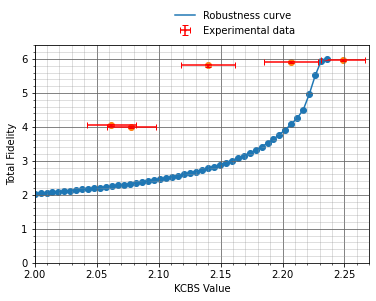

In [136]:
Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()


plt.scatter(Fidata["KCBS Value"],Fidata["Total Fidelity"])
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Robustness curve')


# Experimental data points
list0 = [2.249, 2.207, 2.140, 2.078, 2.062]
list1 =[0.009, 0.011, 0.011, 0.010, 0.010]
xe = []
for k in list1:
    xe.append(1.96*k)

    c = 1.0
    
list2 = [c*5.965, c*5.901, c*5.812,c*3.989,c*4.050]
list3 = [c*0.016, c*0.016, c*0.019, c*0.017, c*0.017]
    
    
ye = []
for k in list3:
    ye.append(1.96*k)
    
plt.scatter(list0, list2) 
plt.errorbar(list0, list2, xerr=xe, yerr=ye, fmt='o', color="r", markersize=1, capsize=3, label = "Experimental data")
# plt.errorbar(list0, list2, xerr=xe, yerr=ye, fmt='o', color="r", markersize=2, capsize=12, label = "Experimental data")
#plt.errorbar(list0, list2, yerr = ye, fmt="o", color="r")

plt.xlim(2,np.sqrt(5)+0.034)
plt.ylim(0,6.4)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Robust_normal.pdf', bbox_inches='tight')

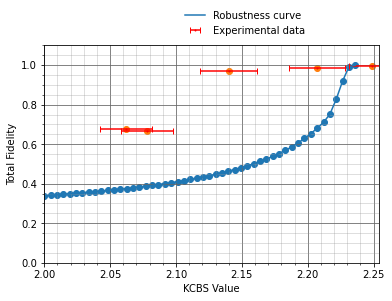

In [135]:
# Normalized plot

Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()
new_x = []
new_y = []
for k in Fidata["KCBS Value"]:
    new_x.append(k)
    
for k in Fidata["Total Fidelity"]:
    new_y.append((1.0/6)*k)
    

    

plt.scatter(new_x, new_y)
plt.plot(new_x, new_y,label='Robustness curve')


# Experimental data points
list0 = [2.249, 2.207, 2.140, 2.078, 2.062]
list1 =[0.009, 0.011, 0.011, 0.010, 0.010]
xe = []
for k in list1:
    xe.append(1.96*k)

c = 1/6.0
    
list2 = [c*5.965, c*5.901, c*5.812,c*3.989,c*4.050]
list3 = [c*0.016, c*0.016, c*0.019, c*0.017, c*0.017]
    
    
ye = []
for k in list3:
    ye.append(1.96*k)
    
plt.scatter(list0, list2)   
plt.errorbar(list0, list2, xerr=xe, fmt='o', color="r", markersize=1, capsize=3, label = "Experimental data")
#plt.errorbar(list0, list2, yerr = ye, fmt="o", color="r")

plt.xlim(2,np.sqrt(5)+0.018)
plt.ylim(0,1.1)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Normalized_Robust_normal.pdf', bbox_inches='tight')

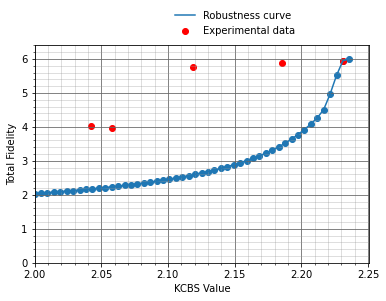

In [115]:
Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()


plt.scatter(Fidata["KCBS Value"],Fidata["Total Fidelity"])
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Robustness curve')


# Experimental data points
list0 = [2.249, 2.207, 2.140, 2.078, 2.062]
list1 =[0.009, 0.011, 0.011, 0.010, 0.010]
xe = []
for k in range(len(list1)):
    list0[k] = list0[k] - 1.96*list1[k]

c= 1.0
list2 = [c*5.965, c*5.901, c*5.812,c*3.989,c*4.050]
list3 = [c*0.016, c*0.016, c*0.019, c*0.017, c*0.017]

for k in range(len(list2)):
    list2[k] = list2[k] - 1.96*list3[k]
    

plt.scatter(list0,list2,color = 'red',label='Experimental data')

plt.xlim(2,np.sqrt(5)+0.015)
plt.ylim(0,6.4)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Sensible_Robust_normal.pdf', bbox_inches='tight')

In [78]:
ye

[0.03136, 0.03136, 0.037239999999999995, 0.03332, 0.03332]

In [79]:
xe

[0.01764, 0.02156, 0.02156, 0.0196, 0.0196]

## Reverse order

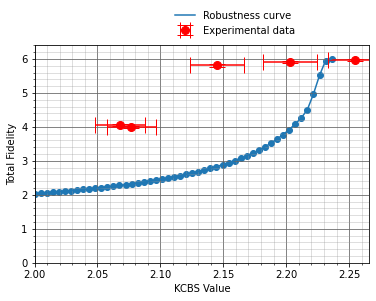

In [130]:
Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()


plt.scatter(Fidata["KCBS Value"],Fidata["Total Fidelity"])
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Robustness curve')


# Experimental data points
list0 = [2.255, 2.203, 2.145, 2.077, 2.068]
list1 =[0.011, 0.011, 0.011, 0.010, 0.010]
xe = []
for k in list1:
    xe.append(1.96*k)

    c = 1.0
    
list2 = [c*5.965, c*5.901, c*5.812,c*3.989,c*4.050]
list3 = [c*0.016, c*0.016, c*0.019, c*0.017, c*0.017]
    
    
ye = []
for k in list3:
    ye.append(1.96*k)
    
plt.scatter(list0, list2)   
plt.errorbar(list0, list2, xerr=xe, yerr=ye, fmt='o', color="r", markersize=8, capsize=8, label = "Experimental data")
#plt.errorbar(list0, list2, yerr = ye, fmt="o", color="r")

plt.xlim(2,np.sqrt(5)+0.03)
plt.ylim(0,6.4)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Robust_reverse.pdf', bbox_inches='tight')

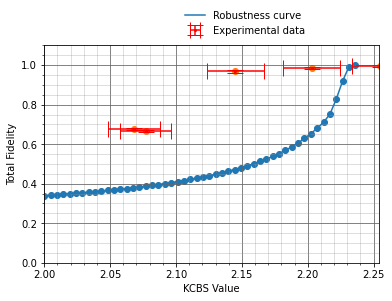

In [127]:
# Normalized plot

Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()
new_x = []
new_y = []
for k in Fidata["KCBS Value"]:
    new_x.append(k)
    
for k in Fidata["Total Fidelity"]:
    new_y.append((1.0/6)*k)
    

    

plt.scatter(new_x, new_y)
plt.plot(new_x, new_y,label='Robustness curve')


# Experimental data points
list0 = [2.255, 2.203, 2.145, 2.077, 2.068]
list1 =[0.011, 0.011, 0.011, 0.010, 0.010]
xe = []
for k in list1:
    xe.append(1.96*k)

c = 1/6.0
    
list2 = [c*5.965, c*5.901, c*5.812,c*3.989,c*4.050]
list3 = [c*0.016, c*0.016, c*0.019, c*0.017, c*0.017]
    
    
ye = []
for k in list3:
    ye.append(1.96*k)
    
plt.scatter(list0, list2)   
plt.errorbar(list0, list2, xerr=xe, yerr=ye, fmt='o', color="r", markersize=2, capsize=8, label = "Experimental data")
#plt.errorbar(list0, list2, yerr = ye, fmt="o", color="r")

plt.xlim(2,np.sqrt(5)+0.018)
plt.ylim(0,1.1)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Normalized_Robust_reverse.pdf', bbox_inches='tight')

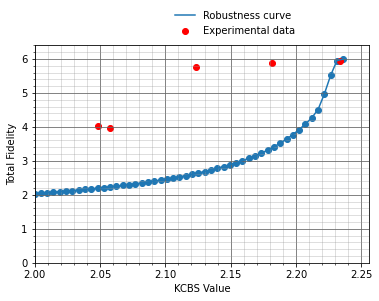

In [128]:
Fidata = pd.read_csv("Robustness_1.csv")
Fidata["KCBS Value"] = Fidata["KCBS Value"]*5 + 2.0
fig = plt.figure()


plt.scatter(Fidata["KCBS Value"],Fidata["Total Fidelity"])
plt.plot(Fidata["KCBS Value"],Fidata["Total Fidelity"],label='Robustness curve')


# Experimental data points
list0 = [2.255, 2.203, 2.145, 2.077, 2.068]
list1 =[0.011, 0.011, 0.011, 0.010, 0.010]
xe = []
for k in range(len(list1)):
    list0[k] = list0[k] - 1.96*list1[k]

c= 1.0
list2 = [c*5.965, c*5.901, c*5.812,c*3.989,c*4.050]
list3 = [c*0.016, c*0.016, c*0.019, c*0.017, c*0.017]

for k in range(len(list2)):
    list2[k] = list2[k] - 1.96*list3[k]
    

plt.scatter(list0,list2,color = 'red',label='Experimental data')

plt.xlim(2,np.sqrt(5)+0.02)
plt.ylim(0,6.4)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.xlabel('KCBS Value')
plt.ylabel('Total Fidelity')
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1.2),shadow=False, ncol=1,frameon=False)
plt.savefig('Sensible_Robust_reverse.pdf', bbox_inches='tight')

In [124]:
np.sqrt(5)

2.23606797749979

In [137]:
Fidata["KCBS Value"]

0     2.000000
1     2.004818
2     2.009635
3     2.014453
4     2.019271
5     2.024089
6     2.028906
7     2.033724
8     2.038542
9     2.043359
10    2.048177
11    2.052995
12    2.057813
13    2.062630
14    2.067448
15    2.072266
16    2.077083
17    2.081901
18    2.086719
19    2.091537
20    2.096354
21    2.101172
22    2.105990
23    2.110807
24    2.115625
25    2.120443
26    2.125261
27    2.130078
28    2.134896
29    2.139714
30    2.144531
31    2.149349
32    2.154167
33    2.158985
34    2.163802
35    2.168620
36    2.173438
37    2.178255
38    2.183073
39    2.187891
40    2.192709
41    2.197526
42    2.202344
43    2.207162
44    2.211979
45    2.216797
46    2.221615
47    2.226433
48    2.231250
49    2.236068
Name: KCBS Value, dtype: float64